<a href="https://colab.research.google.com/github/JonathanLoscalzo/pytorch-tutorials/blob/master/Deep%20Learning%20with%20Pytorch/03_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning and text



## Recurrent Neuronal Network RNN

[DeepLearningBook - Chapter 10](https://www.deeplearningbook.org/contents/rnn.html)

[Supervised Sequence Labelling with Recurrent
Neural Networks - Graves (2012)](https://www.cs.toronto.edu/~graves/preprint.pdf)


[A comprehensive tutorial to torchtext/](http://mlexplained.com/2018/02/08/a-comprehensive-tutorial-to-torchtext/)

Parameter sharing makes it possible to extend and apply the model to examples of diﬀerent forms (diﬀerent lengths, here) and generalize across them. (hidden state)

Sequences Issues (time-series, speech, text): Recurrent neural networks (RNNs) answer this problem by giving neural networks a memory via hidden state.

Issues: 
- vanishing gradient: first layers doesn't learn due to small gradient in these layers. 
- exploding gradient: 




In [0]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [0]:
import torch
if torch.cuda.is_available():
  torch.device('cuda')

In [0]:
from torch import nn

In [449]:
examples = 5
input_size = 3
hidden_size = 9

rnn = nn.RNN(input_size, hidden_size, 2)
# input_size – The number of expected features in the input x
# hidden_size – The number of features in the hidden state h
# num_layers – 

print(rnn)

inputs = torch.randn(examples, 3, 3) # input of network

h0 = torch.randn(2, 3, hidden_size) # initial hidden state

output, hn = rnn(inputs, h0) # returns output and actual hidden state
inputs.shape, output.shape, hn.shape, h0.shape

RNN(3, 9, num_layers=2)


(torch.Size([5, 3, 3]),
 torch.Size([5, 3, 9]),
 torch.Size([2, 3, 9]),
 torch.Size([2, 3, 9]))

[Visual Guide: LSTM & GRU](https://www.youtube.com/watch?v=8HyCNIVRbSU)

### LSTM

[link colah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
The key is to think about the three gates (input, output, and forget)



In [450]:
rnn = nn.LSTM(10, 20, 2)
inputs = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)
output, (hn, cn) = rnn(inputs, (h0, c0))
inputs.shape, output.shape

(torch.Size([5, 3, 10]), torch.Size([5, 3, 20]))


### GRU
Merged the forget gate with the output gate.
They are less powerful than LSTMs.
The LSTM may be a little slower in training, but may end up being the best choice in the end.


In [451]:
rnn = nn.GRU(10, 20, 2)
inputs = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(inputs, h0)
inputs.shape, output.shape

(torch.Size([5, 3, 10]), torch.Size([5, 3, 20]))



### biLSTM
sometimes you need to see the future, as translation or writting.
it’s essentially two stacked LSTMs, with the input being sent in the forward direction in one LSTM and reversed in the second.


In [452]:
rnn = nn.LSTM(10, 20, 2, bidirectional=True)
inputs = torch.randn(5, 3, 10)
h0 = torch.randn(4, 3, 20) # duplicate size
c0 = torch.randn(4, 3, 20) # duplicate size
output, (hn, cn) = rnn(inputs, (h0, c0))
inputs.shape, output.shape

(torch.Size([5, 3, 10]), torch.Size([5, 3, 40]))

### Embeddings
[link]( https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html)
first approach: 
- one-hot encoding of the words.
- unk, start, stop are tokens

A famous example of embedding vectors is word2vec.  This was a set of word embeddings trained using a shallow neural network, and it revealed that the transformation into vector space seemed to capture something about the concepts underpinning the words.

Other pretrained embeddings: GloVe, ELMo, fasttext

In [453]:
vocab_size=10
dimension_size=2

# This will contain a tensor of vocab_size x dimension_size
embed = nn.Embedding(vocab_size, dimension_size)

inputs = torch.tensor([1,2,3,4,5])

embed(inputs), embed.forward(inputs)

(tensor([[ 0.3748,  0.9676],
         [ 0.1376, -1.2762],
         [ 0.3756,  1.6587],
         [ 0.9196,  0.8289],
         [ 2.3829,  0.8844]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.3748,  0.9676],
         [ 0.1376, -1.2762],
         [ 0.3756,  1.6587],
         [ 0.9196,  0.8289],
         [ 2.3829,  0.8844]], grad_fn=<EmbeddingBackward>))

In [0]:
%%capture output
!pip install torchtext==0.6.0
import torchtext
import pandas as pd

Data were downloaded from http://help.sentiment140.com/for-students

In [0]:
# %%capture output
!wget -nc -nv http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

In [456]:
# %%capture output
!unzip -o trainingandtestdata.zip -d ./

Archive:  trainingandtestdata.zip
  inflating: ./testdata.manual.2009.06.14.csv  
  inflating: ./training.1600000.processed.noemoticon.csv  


In [0]:
# 0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
# 1 - the id of the tweet (2087)
# 2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
# 3 - the query (lyx). If there is no query, then this value is NO_QUERY.
# 4 - the user that tweeted (robotickilldozr)
# 5 - the text of the tweet (Lyx is cool)

columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

## Start Learning


### Explore dataset
If you explore the ./content/... folder you will see 2 new files: 
- /content/testdata.manual.2009.06.14.csv: for testing purpose
- /content/training.1600000.processed.noemoticon.csv: for training purpose


In [458]:
data = pd.read_csv('./training.1600000.processed.noemoticon.csv', 
                   header=None,
                   encoding='latin')
datatest = pd.read_csv('./testdata.manual.2009.06.14.csv', 
                   header=None,
                   encoding='latin')
data.columns = columns
datatest.columns = columns
data.sample(5)

,polarity,id,date,query,user,text
1298687,4,2005311576,Tue Jun 02 09:30:55 PDT 2009,NO_QUERY,Naome,Am looking forward to watching Twilight with s...
1413563,4,2056860959,Sat Jun 06 11:55:59 PDT 2009,NO_QUERY,hipEchik,@car4dave Never mind Debra...what are YOU gonn...
387626,0,2054053245,Sat Jun 06 06:26:11 PDT 2009,NO_QUERY,SongBird502,"at work, so i'll have to chat later."
773451,0,2303248857,Tue Jun 23 17:56:01 PDT 2009,NO_QUERY,haleyhodgson14,Weee I'm goin up north with my bffl sofia!!!!!...
1341233,4,2031329284,Thu Jun 04 09:39:49 PDT 2009,NO_QUERY,KellyB_,@BethRussell_ thanks Beth Russell I think I w...


In [459]:
data.info(), datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   user      1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  498 non-null    int64 
 1   id        498 non-null    int64 
 2   date      498 non-null    object
 3   query     498 non-null    object
 4   user      498 non-null    object
 5   text      498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


(None, None)

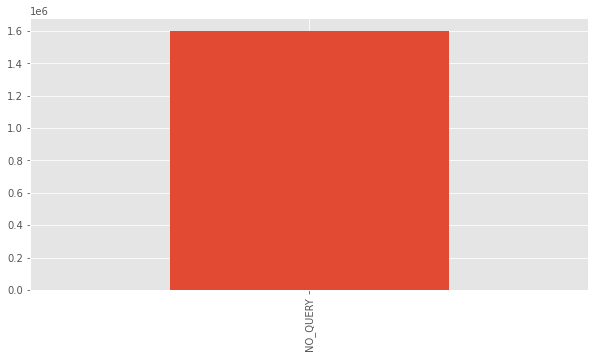

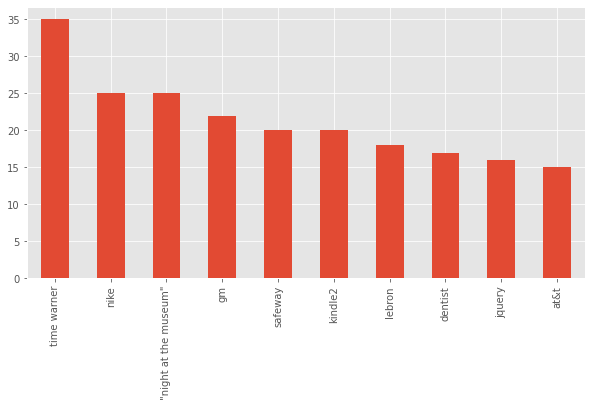

In [460]:
data.loc[:,'query'].value_counts()[0:10].plot.bar(figsize=(10,5))
plt.show()

datatest.loc[:,'query'].value_counts()[0:10].plot.bar(figsize=(10,5))

The above graphs shows the feature "query". In testing has many values, but in trainig only "NO_QUERY". So, we will discard it.

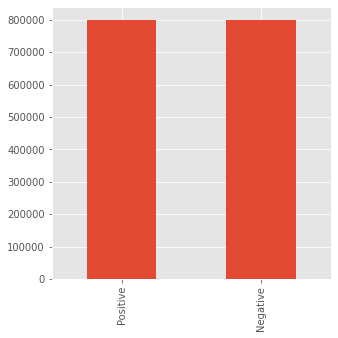

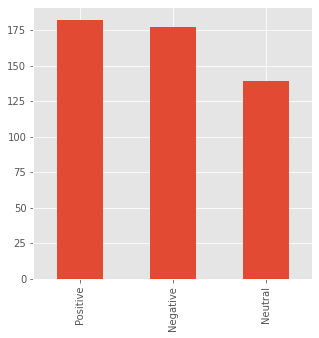

In [461]:
# (0 = negative, 2 = neutral, 4 = positive)
data['polarity'].value_counts()[0:10].plot.bar(figsize=(5,5))
plt.xticks([0,1],["Positive", "Negative"])
plt.show()

datatest['polarity'].value_counts()[0:10].plot.bar(figsize=(5,5))
plt.xticks([0,1,2],["Positive", "Negative", "Neutral"])
plt.show()

Save polarity as a category (0,1,2)

In [0]:
dtype = datatest['polarity'].astype('category').dtype
data['polarity_cat'] = data.polarity.astype(dtype)
datatest['polarity_cat'] = datatest.polarity.astype(dtype)

In [0]:
data['old_polarity'] = data.polarity
datatest['old_polarity'] = data.polarity
data.polarity = data.polarity_cat.cat.codes
datatest.polarity = datatest.polarity_cat.cat.codes

In [0]:
cats = pd.Series([0,2,4], dtype=dtype)

dictcats = { code: cat for code, cat in zip(cats.cat.codes.values, cats.cat.categories.values)}
dictcats
dictcats_names = { 0: "negative", 2: "neutral", 4: "positive" }

See some examples

In [465]:
print(data.iloc[data.text.str.count(' ').argsort()[-10::]].text.values)
print(data.text.str.count(' ').max())

["Heute Hannah Montana - Der Film                                                                  I'm Yours - Jason Mraz "
 'Guten Morgen Twitterland                         Happy Birthday Dad                                                I love you '
 'Ry, food in toaster oven-Cu in AM!                                                                        Gnight All!  '
 'I want to work                                                                            Just finished bathing :o'
 'Do you like matheW?                                                                                   SumMEr oH*9 (:'
 'loved seeing elena ! i love my worm  exhausted xx                                                                               __'
 '-----&gt;bite hard&lt;----                                                                                       damn this blows.'
 'will i ever stop feeling crappy?  all signs point to no.                                                            

In [466]:
data.to_csv('./processed_train.csv', header=None, index = None)
datatest.to_csv('./processed_test.csv', header=None, index = None)
data.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text', 'polarity_cat',
       'old_polarity'],
      dtype='object')

### Data Ingestion as TabularDataset

There are various built-in Datasets in torchtext that handle common data formats. For csv/tsv files, the TabularDataset class is convenient.

For the TabularDataset, we pass in a list of (name, field) pairs as the fields argument. The fields we pass in must be in the same order as the columns. For the columns we don't use, we pass in a tuple where the field element is None

In [0]:
## Defining fields for the model
# https://pytorch.org/text/data.html#field

LABEL = torchtext.data.LabelField()
TWEET = torchtext.data.Field(tokenize='spacy', lower=True)

In [0]:
fields = [
  ('polarity', LABEL), 
  ('id',None),
  ('date',None),
  ('query',None),
  ('user',None),
  ('text', TWEET),
  ('polarity_cat', None),
  ('old_polarity', None)
]


In [0]:
twitterDataset = torchtext.data.TabularDataset(
      path='./processed_test.csv',
      format="CSV",
      fields=fields,
      skip_header=False
)

In [470]:
(train, test, valid) = twitterDataset.split(split_ratio=[0.8,0.1,0.1])
print(len(train), len(test), len(valid))

398 50 50


In [471]:
train[0] == train.examples[0]

True

In [472]:
" ".join(train[0].text)

'rt @blknprecious1 : rt great @dbroos " someone \'s sitting in the shade today because someone planted a tree a long time ago . "- warren buffet'

In [473]:
train[0].polarity

'2'

Torchtext handles mapping words to integers, but it has to be told the full range of words it should handle. 

This makes torchtext go through all the elements in the training set, check the contents corresponding to the TEXT and LABEL fields, and register the words in its vocabulary. 

In [0]:
# Build a vocabulary
vocab_size = 20000
TWEET.build_vocab(train, max_size = vocab_size)
LABEL.build_vocab(train)

After building vocab, the Vocab class holds a mapping from word to id in its `stoi` attribute and a reverse mapping in its `itos` attribute. 

In [475]:
print( TWEET.vocab.itos[0:10] )
print( TWEET.vocab.stoi['algoquenoexiste'])
print( TWEET.vocab.stoi['!'])
print( TWEET.vocab.stoi['lebron'] )


['<unk>', '<pad>', '.', 'the', '!', 'i', 'to', ',', 'a', 'is']
0
4
59


In [476]:
print([ TWEET.vocab.stoi[word.lower()] for word in "@foxnews Pelosi should stay in China and never come back".split(' ')])

[691, 272, 280, 1748, 22, 96, 10, 174, 160, 92]


see: [ why torch see in columns instead of rows? ]

**vocabulary size**

torchtext will add two more special tokens, `<unk>` for unknown words and `<pad>` , a padding token that will be used to pad all our text to roughly the same size.


In [477]:
len(TWEET.vocab), len(LABEL.vocab)

(1941, 3)

You can also specify eos_token or init_token symbols when you declare a field, but they’re not included by default.

In [478]:
TWEET.preprocess("Esto es un ejemplo")

['esto', 'es', 'un', 'ejemplo']

In [479]:
np.array(TWEET.pad(["Esto es un ejemplo", "perro viejo"])).reshape(-1,18)

array([['E', 's', 't', 'o', ' ', 'e', 's', ' ', 'u', 'n', ' ', 'e', 'j',
        'e', 'm', 'p', 'l', 'o'],
       ['p', 'e', 'r', 'r', 'o', ' ', 'v', 'i', 'e', 'j', 'o', '<pad>',
        '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']],
      dtype='<U5')

In [480]:
processed = TWEET.process("This is a huge house")
processed, processed.shape

(tensor([[   0,    0,    5,    0,   16,    5,    0,   16,    8,   16,    0,  116,
             0, 1063,   16,    0,  211,  116,    0, 1063]]),
 torch.Size([1, 20]))

In [481]:
TWEET.vocab.freqs.most_common(10)

[('.', 311),
 ('the', 189),
 ('!', 163),
 ('i', 148),
 ('to', 125),
 (',', 121),
 ('a', 107),
 ('is', 86),
 ('and', 76),
 ('at', 59)]

Note: we must do some cleaning task before this step.

The BucketIterator is one of the most powerful features of torchtext. It automatically shuffles and buckets the input sequences into sequences of similar length

In [0]:
train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
  (train, valid, test), 
  batch_size = 5, 
  device = 'cuda',
  sort_key = lambda x: len(x.text),
  sort_within_batch = False
)
# https://github.com/pytorch/text/issues/474#issue-379615560

The columns represents our data encoded. So see above.

In [483]:
for bix, b in enumerate(train_iterator):
  print(bix, b.polarity, b.text.shape)
  print(b.text) # columns are phrases [ sequence_size, batch_size ]
  break

0 tensor([0, 0, 0, 0, 0], device='cuda:0') torch.Size([25, 5])
tensor([[ 813,  445,   88,   89,    5],
        [ 134,  129,    5,  738,   68],
        [ 614,   24,  106,   13,  244],
        [  47,   33,   48,   38,  277],
        [  16,   12,  134,   26,   88],
        [  19,   16, 1011, 1815,    2],
        [  69,  445, 1906,   37,  462],
        [ 805,    9, 1675,   43,    9],
        [  22,  938,   55, 1398,  108],
        [ 367,   10, 1388,  381,  140],
        [ 417,  477,   17,   60,  167],
        [ 367,    8,   61,  658,   54],
        [   4,  834,   86,    1,  102],
        [   4,   28,    7,    1,   66],
        [   4, 1057,  127,    1,  152],
        [   1,    2, 1413,    1,  158],
        [   1,   16,   10,    1, 1852],
        [   1, 1845,  754,    1,  156],
        [   1,    9, 1805,    1,  138],
        [   1,   70,    4,    1,    5],
        [   1,  464,    1,    1,    6],
        [   1,   10,    1,    1,  107],
        [   1,  477,    1,    1,    1],
        [   1,   

### Defining a model

The iterator returns shape => (sequence_len, batch_size)
Embedding Layer:
- input ( * )
- output (*, embedding_size)

So embedding returns shape => (seq_len, batch_size, embedding_size)

Luego cualquier RNN, en este caso LSTM espera:
- Input (seq_len, batch_size, input_size)

- output: output, (h_n, c_n)
  - output: (seq_len, batch, num_directions * hidden_size)
  - h_n: (num_layers * num_directions, batch, hidden_size)
  - c_n:(num_layers * num_directions, batch, hidden_size)

In conclusion, input_size should be embedding_dim


Ver https://towardsdatascience.com/understand-how-to-use-namedtuple-and-dataclass-in-python-e82e535c3691

In [0]:
class ClassifierLSTM(nn.Module):
  # https://github.com/jiangqy/LSTM-Classification-Pytorch/blob/master/utils/LSTMClassifier.py
  def __init__(self, embedding_dim, vocab_size, hidden_size, 
               num_classes, num_layers=1, bidirectional=False,
               use_only_last_hidden=False):
    super(ClassifierLSTM, self).__init__()

    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.bi = 2 if bidirectional else 1
    self.fc_inputs = hidden_size*num_layers*self.bi
    self.use_only_last_hidden = use_only_last_hidden

    # the words in our text are pushed into an Embedding layer,
    # https://pytorch.org/docs/stable/nn.html#embedding
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    
    # That’s then fed into a LSTM with hidden_size hidden features
    self.encoder = nn.LSTM(
      input_size=embedding_dim,
      hidden_size=hidden_size, 
      num_layers=num_layers,
      bidirectional=bidirectional
    )

    # the final hidden state is pushed through a standard fully connected layer
    if use_only_last_hidden:
      self.predictor = nn.Linear(self.fc_inputs, num_classes)
    else:
      self.predictor = nn.Linear(hidden_size, num_classes)

  def forward(self, seq):
    # https://discuss.pytorch.org/t/understanding-lstm-input/31110
    # https://discuss.pytorch.org/t/understanding-3-dimensions-of-input-in-nn-lstm-input-hidden/65813
    # https://discuss.pytorch.org/t/understanding-output-of-lstm/12320/2?u=jpeg729
    # https://stackoverflow.com/questions/49466894/how-to-correctly-give-inputs-to-embedding-lstm-and-linear-layers-in-pytorch
    # https://stackoverflow.com/questions/48302810/whats-the-difference-between-hidden-and-output-in-pytorch-lstm/48305882#48305882
    
    output, (hidden,_) = self.encoder(self.embedding(seq))

    if self.use_only_last_hidden:
      return self.predictor(hidden.reshape(-1,self.fc_inputs))
    else:
      return self.predictor(hidden[-1].squeeze(0))

  def training_step(self, batch, loss_fn):
    inputs, labels = batch 
    out = self(inputs) # Generate predictions call forward method
    loss = loss_fn(out, labels) # Calculate loss
    return loss
    
  def validation_step(self, batch, loss_fn, metric):
    inputs, labels = batch 
    out = self(inputs)          # Generate predictions call forward method
    loss = loss_fn(out, labels) # Calculate loss
    acc = metric(out, labels)   # Calculate accuracy
    return {'val_loss': loss, 'val_acc': acc}
        
  def validation_epoch_end(self, outputs):
    #TODO: refactor
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses

    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies

    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, 
        result['val_loss'], 
        result['val_acc'])
    )
    print("*"*25)


In [0]:
from tqdm import tqdm

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def fit(epochs, model, train_iterator, val_loader, optimizer, loss_fn):
    # TODO: return best_model
    history = []

    for epoch in range(1,epochs+1):
        # Training Phase 
        model.train()
        for bix, batch in enumerate(train_iterator):
            inputs = (batch.text, batch.polarity)
            optimizer.zero_grad()
            loss = model.training_step(inputs, loss_fn)
            loss.backward()
            optimizer.step()
        
        # Validation phase
        model.eval()
        outputs = []
        for bix, batch in enumerate(val_loader):
          inputs = (batch.text, batch.polarity)
          optimizer.zero_grad()
          outputs.append(model.validation_step(inputs, loss_fn, accuracy))
        results = model.validation_epoch_end(outputs)

        # Epoch Ended
        model.epoch_end(epoch, results)
        history.append(results)

    return history

In [621]:
model = ClassifierLSTM(
  hidden_size=100, 
  embedding_dim=300, 
  vocab_size=len(TWEET.vocab),
  num_classes=3,
  num_layers=2,
  bidirectional=False,
  use_only_last_hidden=False
)
model.to('cuda')

ClassifierLSTM(
  (embedding): Embedding(1941, 300)
  (encoder): LSTM(300, 100, num_layers=2)
  (predictor): Linear(in_features=100, out_features=3, bias=True)
)

In [622]:
# calculate gradients
loss_fn = torch.nn.CrossEntropyLoss()

# update parameters by optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
history1 = fit(50, model, train_iterator, valid_iterator, optimizer, loss_fn)

Epoch [1], val_loss: 1.0542, val_acc: 0.3800
*************************
Epoch [2], val_loss: 1.0428, val_acc: 0.4400
*************************
Epoch [3], val_loss: 1.3476, val_acc: 0.4600
*************************
Epoch [4], val_loss: 1.5415, val_acc: 0.4600
*************************
Epoch [5], val_loss: 1.4892, val_acc: 0.5000
*************************
Epoch [6], val_loss: 1.6054, val_acc: 0.5000
*************************
Epoch [7], val_loss: 2.2184, val_acc: 0.4600
*************************
Epoch [8], val_loss: 2.2650, val_acc: 0.4800
*************************
Epoch [9], val_loss: 1.9215, val_acc: 0.5000
*************************
Epoch [10], val_loss: 2.3665, val_acc: 0.4600
*************************
Epoch [11], val_loss: 2.3531, val_acc: 0.5000
*************************
Epoch [12], val_loss: 2.4979, val_acc: 0.5200
*************************
Epoch [13], val_loss: 2.5881, val_acc: 0.5200
*************************
Epoch [14], val_loss: 2.6620, val_acc: 0.4600
*************************
E

In [623]:
# update parameters by optimizer
optimizer2 = torch.optim.Adam(model.parameters(), lr=0.0005)

history2 = fit(20, model, train_iterator, valid_iterator, optimizer2, loss_fn)

Epoch [1], val_loss: 4.0099, val_acc: 0.6000
*************************
Epoch [2], val_loss: 4.2414, val_acc: 0.5800
*************************
Epoch [3], val_loss: 3.7721, val_acc: 0.6200
*************************
Epoch [4], val_loss: 3.1784, val_acc: 0.5000
*************************
Epoch [5], val_loss: 3.2648, val_acc: 0.5200
*************************
Epoch [6], val_loss: 3.3444, val_acc: 0.5000
*************************
Epoch [7], val_loss: 3.4146, val_acc: 0.4800
*************************
Epoch [8], val_loss: 3.4736, val_acc: 0.4800
*************************
Epoch [9], val_loss: 3.5297, val_acc: 0.5000
*************************
Epoch [10], val_loss: 3.5667, val_acc: 0.5000
*************************
Epoch [11], val_loss: 3.6059, val_acc: 0.5000
*************************
Epoch [12], val_loss: 3.6374, val_acc: 0.4800
*************************
Epoch [13], val_loss: 3.6619, val_acc: 0.4800
*************************
Epoch [14], val_loss: 3.6866, val_acc: 0.4800
*************************
E

### Learning History

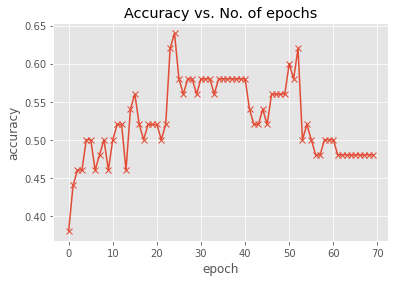

In [624]:
history = history1 + history2
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Evaluate results in test data


In [595]:
for batch in test_iterator:
  with torch.no_grad():
    outputs = model(batch.text)
    print(outputs.argmax(dim=1), batch.polarity, accuracy(outputs, batch.polarity))

tensor([2, 1, 0, 2, 0], device='cuda:0') tensor([2, 1, 0, 2, 0], device='cuda:0') tensor(1.)
tensor([0, 0, 0, 1, 2], device='cuda:0') tensor([0, 0, 2, 2, 2], device='cuda:0') tensor(0.6000)
tensor([2, 1, 1, 1, 2], device='cuda:0') tensor([1, 1, 0, 1, 2], device='cuda:0') tensor(0.6000)
tensor([1, 2, 0, 1, 2], device='cuda:0') tensor([1, 2, 1, 2, 1], device='cuda:0') tensor(0.4000)
tensor([1, 1, 0, 0, 1], device='cuda:0') tensor([1, 1, 1, 1, 0], device='cuda:0') tensor(0.4000)
tensor([1, 1, 0, 0, 1], device='cuda:0') tensor([1, 0, 1, 0, 0], device='cuda:0') tensor(0.4000)
tensor([0, 0, 2, 1, 1], device='cuda:0') tensor([1, 0, 2, 1, 1], device='cuda:0') tensor(0.8000)
tensor([1, 1, 1, 0, 1], device='cuda:0') tensor([1, 1, 1, 1, 0], device='cuda:0') tensor(0.6000)
tensor([0, 1, 1, 0, 1], device='cuda:0') tensor([2, 1, 2, 0, 0], device='cuda:0') tensor(0.4000)
tensor([0, 0, 0, 1, 0], device='cuda:0') tensor([0, 0, 0, 0, 0], device='cuda:0') tensor(0.8000)


### Production (?)


In [0]:
def classify_tweet(tweet):
  categories = dictcats
  processed = TWEET.process([TWEET.preprocess(tweet)])
  processed = processed.to('cuda')
  with torch.no_grad():
    return dictcats_names[categories[model(processed).argmax(dim=1).item()]]

In [597]:
#@title ### Test the model!
tweet_text = "this is well" #@param {type:"string"}
classify_tweet(tweet_text)

'neutral'

## Advance: Data augmentation

the paper “EDA: Easy Data Augmentation Techniques for
Boosting Performance on Text Classification Tasks” suggested three other augmentation strategies: random insertion, random swap, and random
deletion.

### Random Insertion
Replace words with synonyms

### Random Deletion
Given a probability parameter p , it will go through the sentence and decide whether to delete a word or not based on that random probability:

In [0]:
import random
def random_deletion(words, p=0.5):
  if len(words) == 1:
    return words
  remaining = list(filter(lambda x: random.uniform(0,1) > p,words))
  print("Remaining: ", remaining)
  if len(remaining) == 0:
    return [random.choice(words)]
  else:
    return remaining

In [298]:
print(random_deletion(["aloha"]))
print(15*"*")
print(random_deletion(["aloha", "pepe", "ddfsfsd"]))

['aloha']
***************
Remaining:  ['ddfsfsd']
['ddfsfsd']


### Random Swap
Swaps words within it n times

In [0]:
def random_swap(sentence, n=5):
  length = range(len(sentence))
  for _ in range(n):
    idx1, idx2 = random.sample(length, 2)
    sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1]
  return sentence

In [300]:
random_swap("i am very proud of you".split(" "), n=2)

['am', 'i', 'very', 'of', 'proud', 'you']

### Back Translation
English => any language => English again

Note: take care about been banned from google_translate. They could be detect your Ip. So Use it with caution and batched 

In [304]:
!pip install googletrans

In [310]:
import googletrans
from googletrans import Translator 

translator = Translator()
sentences = ['The cat sat on the carpet']

translation_es = translator.translate(sentences, dest='es')
es_text = [t.text for t in translation_es]

translation_fr = translator.translate(es_text, dest='fr')
fr_text = [t.text for t in translation_fr]

translation_en = translator.translate(fr_text, dest='en')
en_text = [t.text for t in translation_en]

print(en_text)

['The cat sat on the mat']


### Torchtext utils???
Expand this section with other technics.

Although, torch leans on spacy to do preprocessing.

## Next steps

- you can increase num_layers to create stacked LSTMs, 
- increase or decrease the number of hidden features in the layer, 
- set bidirectional=true to create a biLSTM. 

- replacing lstm wit gru
does it train faster? Is it more accurate? (Experiment and see what you find)